# Housing market in Melbourne

https://www.kaggle.com/datasets/dansbecker/melbourne-housing-snapshot

1) Connect to drive

In [302]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


2) Unzip dataset

In [2]:
! unzip "drive/MyDrive/DataViz/housing_dataset.zip"

Archive:  drive/MyDrive/DataViz/housing_dataset.zip
  inflating: melb_data.csv           


## Adjust dataframe

3) Read the dataset and get an overview

In [303]:
# 3)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

sns.set_style("whitegrid")

df = pd.read_csv('melb_data.csv')
# df.dtypes
# df.describe()
# df.info()
df.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

4) Drop rows that have at least one undefined values given the subset of columns, then drop duplicates

In [304]:
# 4)
print(df.columns)
subset=['Suburb', 'Address', 'Rooms', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'YearBuilt', 'CouncilArea']
df.dropna(subset=subset, inplace=True)
df.drop_duplicates(inplace=True)
len(df.values)

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')


7448

5) Add a new field named `Street` extracted from the `Address` field

In [305]:
df['Street'] = df['Address'].str.split()
df['Street'] = df['Street'].apply(lambda l: ' '.join(l[1:]))
df['YearBuilt'] = df['YearBuilt'].apply(lambda year: int(year))
df

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Street
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,0.0,156.0,79.00,1900,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0,Bloomburg St
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,0.0,134.0,150.00,1900,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0,Charles St
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,2.0,120.0,142.00,2014,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0,Park St
6,Abbotsford,124 Yarra St,3,h,1876000.0,S,Nelson,7/05/2016,2.5,3067.0,...,0.0,245.0,210.00,1910,Yarra,-37.80240,144.99930,Northern Metropolitan,4019.0,Yarra St
7,Abbotsford,98 Charles St,2,h,1636000.0,S,Nelson,8/10/2016,2.5,3067.0,...,2.0,256.0,107.00,1890,Yarra,-37.80600,144.99540,Northern Metropolitan,4019.0,Charles St
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12205,Whittlesea,30 Sherwin St,3,h,601000.0,S,Ray,29/07/2017,35.5,3757.0,...,1.0,972.0,149.00,1996,Whittlesea,-37.51232,145.13282,Northern Victoria,2170.0,Sherwin St
12206,Williamstown,75 Cecil St,3,h,1050000.0,VB,Williams,29/07/2017,6.8,3016.0,...,0.0,179.0,115.00,1890,Hobsons Bay,-37.86558,144.90474,Western Metropolitan,6380.0,Cecil St
12207,Williamstown,2/29 Dover Rd,1,u,385000.0,SP,Williams,29/07/2017,6.8,3016.0,...,1.0,0.0,35.64,1967,Hobsons Bay,-37.85588,144.89936,Western Metropolitan,6380.0,Dover Rd
12209,Windsor,201/152 Peel St,2,u,560000.0,PI,hockingstuart,29/07/2017,4.6,3181.0,...,1.0,0.0,61.60,2012,Stonnington,-37.85581,144.99025,Southern Metropolitan,4380.0,Peel St


6) Remove constructions built before 1800 and format the `Date` field

In [306]:
df = df[df['YearBuilt'] > 1800]
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

<ipython-input-306-a1c34f69b3db>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



7) Create another field named `MonthName`

In [307]:
df['Month'] = df['Date'].dt.month

month_names = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May',
               6: 'June', 7: 'July', 8: 'August', 9: 'September', 10: 'October',
               11: 'November', 12: 'December'}

df['MonthName'] = df['Month'].map(month_names)

order_months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

<ipython-input-307-0b779f489cf3>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-307-0b779f489cf3>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



8) Add a new field named `City` (useful for the sunburst chart)

In [308]:
df['City'] = 'Melbourne'

<ipython-input-308-d341861cf58a>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



## Data exploration

9) Price distribution

<ipython-input-334-7386e268c06b>:1: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



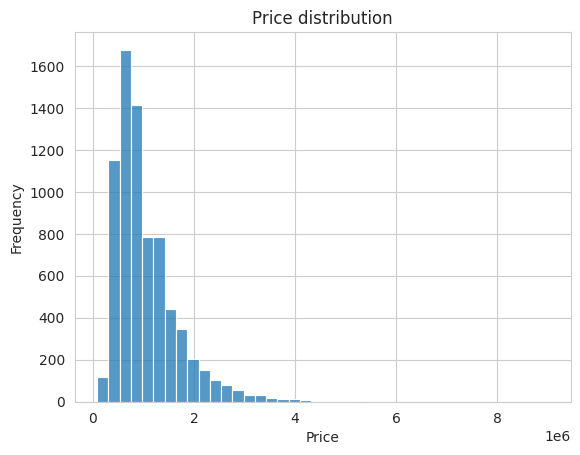

In [334]:
sns.histplot(data=df, x='Price', bins=40, palette='bright')

plt.title('Price distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')

plt.show()

10) Landsize distribution

<ipython-input-335-9b96a983ca74>:1: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



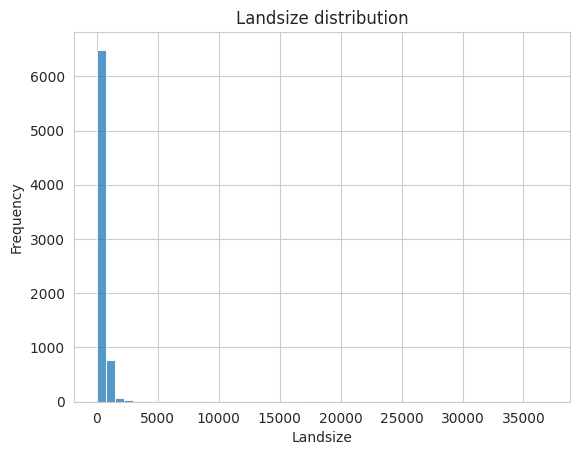

In [335]:
sns.histplot(data=df, x='Landsize', bins=50, palette='bright')

plt.title('Landsize distribution')
plt.xlabel('Landsize')
plt.ylabel('Frequency')

plt.show()

11) Building Area distribution

<ipython-input-336-291aae75be04>:1: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



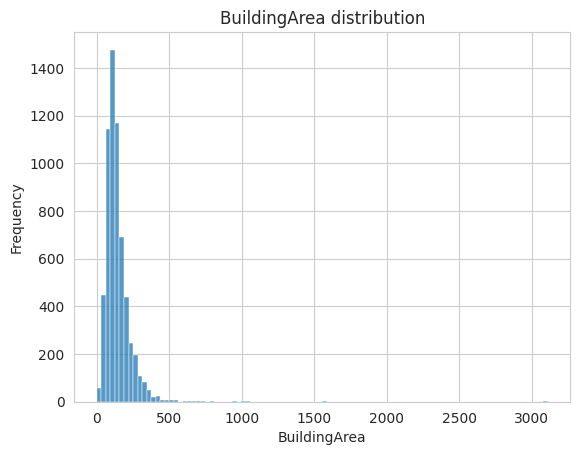

In [336]:
sns.histplot(data=df, x='BuildingArea', bins=100, palette='bright')

plt.title('BuildingArea distribution')
plt.xlabel('BuildingArea')
plt.ylabel('Frequency')

plt.show()

12) Correlation heatmap


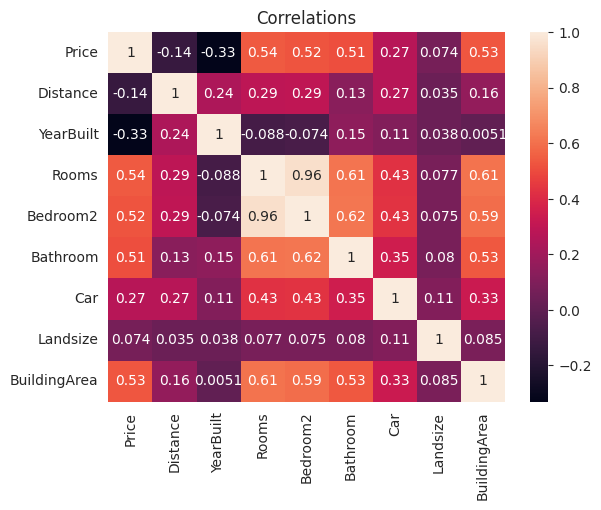

In [337]:
df_corr = df[['Price', 'Distance', 'YearBuilt', 'Rooms', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea']].corr()
sns.heatmap(df_corr , annot = True)

plt.title('Correlations')
plt.show()

13) YearBuilt distribution on the **map**

<Axes: xlabel='Lattitude', ylabel='Longtitude'>

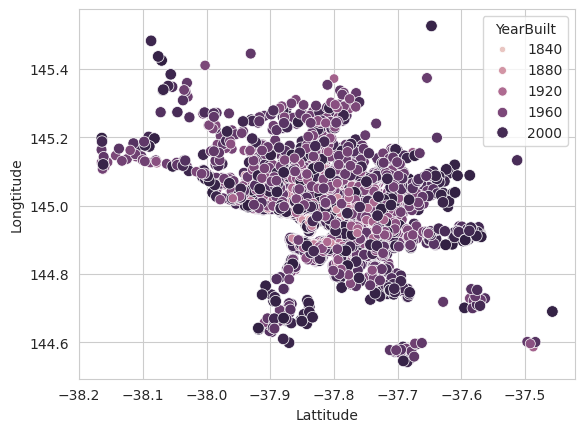

In [338]:
sns.scatterplot(df, x="Lattitude", y="Longtitude", hue="YearBuilt", size='YearBuilt')

14) Pairplot of relevant metrics

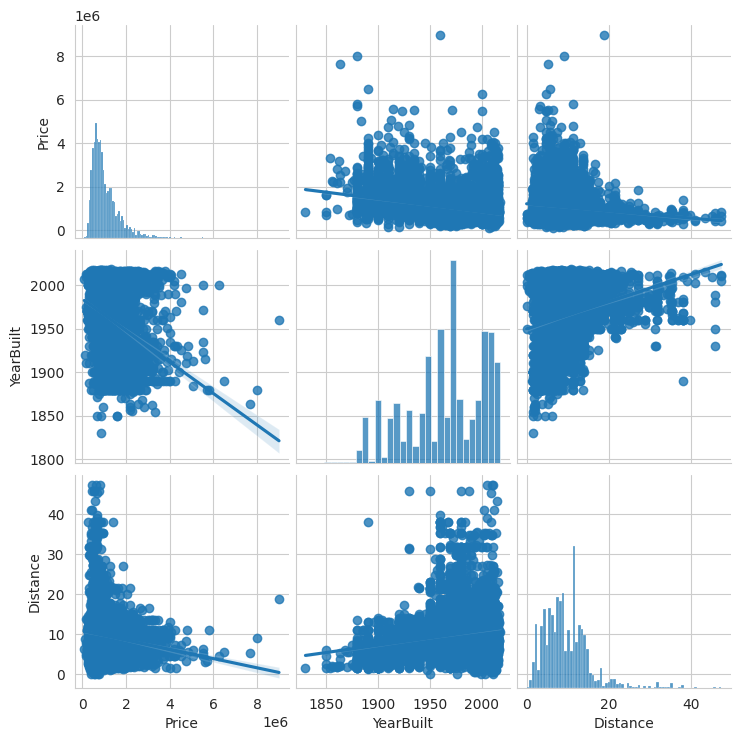

In [339]:
sns.pairplot(df, vars=['Price', 'YearBuilt', 'Distance'], kind="reg")

## Geographic Analysis

15) Sunburst plot showing the number of properties in this dataset

In [340]:
# THRESHOLD = 1
# df['Suburb_street'] = df['Suburb'] + ' ' + df['Street']
# suburb_street_counts = df['Suburb_street'].value_counts()

# frequent_suburbs_streets = suburb_street_counts[suburb_street_counts > THRESHOLD].index
# filtered_suburbs_streets_df = df[df['Suburb_street'].isin(frequent_suburbs_streets)]

# THRESHOLD = 80
# suburb_counts = filtered_suburbs_streets_df['Suburb'].value_counts()

# frequent_suburbs = suburb_counts[suburb_counts > THRESHOLD].index
# filtered_df = filtered_suburbs_streets_df[filtered_suburbs_streets_df['Suburb'].isin(frequent_suburbs)]


fig = px.sunburst(
    df,
    path=['City', 'Regionname', 'Suburb', 'Street'],
    values=[1] * len(df.values),
    color='Regionname',
    color_continuous_scale='RdBu',
    title=f'Property countert'
)
fig.show()

16) Sunburst plot showing the number of properties on sale

In [341]:
filtered_df = df.groupby('Suburb')['Suburb'].value_counts().reset_index().sort_values('count', ascending=False)
suburbs = filtered_df[:20]['Suburb'].to_list()

filtered_df = df.groupby(['Suburb', 'Street'])['Street'].value_counts().reset_index().sort_values('count', ascending=False)
streets = filtered_df[:50]['Street'].to_list()

df_suburbs = df[(df['Suburb'].isin(suburbs)) & (df['Street'].isin(streets))]

fig = px.sunburst(
    df_suburbs,
    path=['City', 'Regionname', 'Suburb', 'Street'],
    values=[1] * len(df_suburbs.values),
    color='Regionname',
    color_continuous_scale='RdBu',
    title=f'Property counter'
)
fig.show()

17) Boxplot showing `Price` distribution by `Region`

<ipython-input-342-025ee49ee546>:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




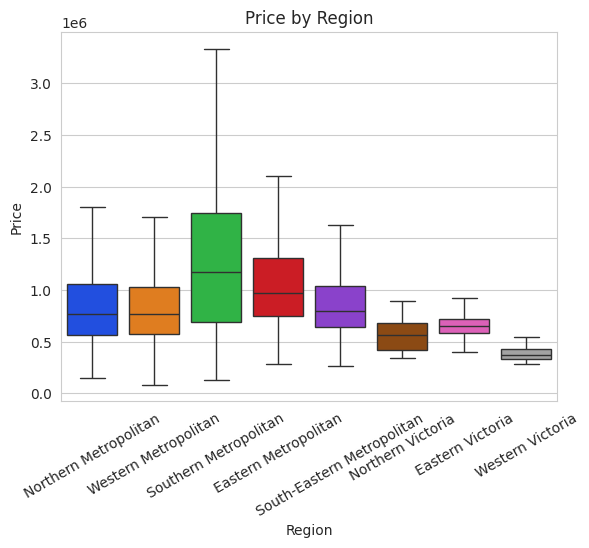

In [342]:
sns.boxplot(data=df, x='Regionname', y='Price', palette='bright', showfliers=False)

plt.xticks(rotation=30)
plt.title('Price by Region')
plt.xlabel('Region')
plt.ylabel('Price')

plt.show()

18) Stacked histplot showing the distribution of properties over the years these were built in by `Region`

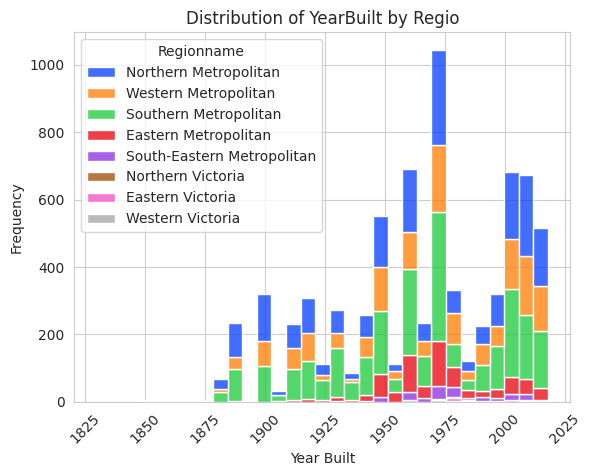

In [343]:
sns.histplot(data=df, x='YearBuilt', hue='Regionname', multiple="stack", palette='bright')

plt.xticks(rotation=45)
plt.title('Distribution of YearBuilt by Regio')
plt.xlabel('Year Built')
plt.ylabel('Frequency')

plt.show()

19) Countplot showing the number of properties on sale by `Type`

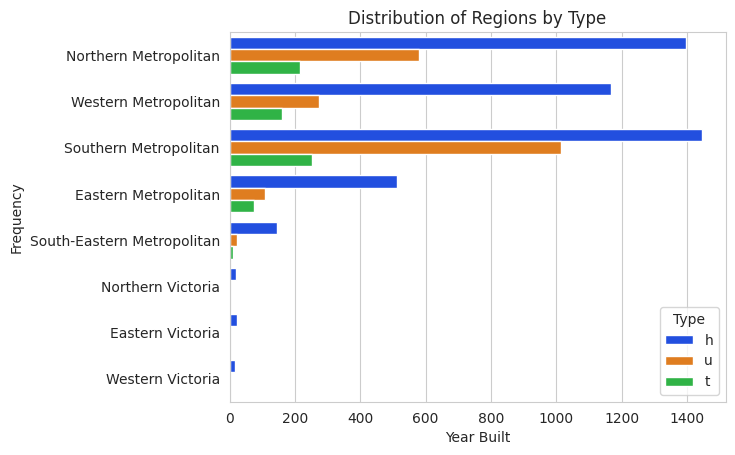

In [344]:
sns.countplot(data=df, y='Regionname', hue='Type', palette='bright')

plt.title('Distribution of Regions by Type')
plt.xlabel('Year Built')
plt.ylabel('Frequency')

plt.show()

20) Scatterplot showing the relationship between the `Year` houses were built, `Distance`, and `Price`

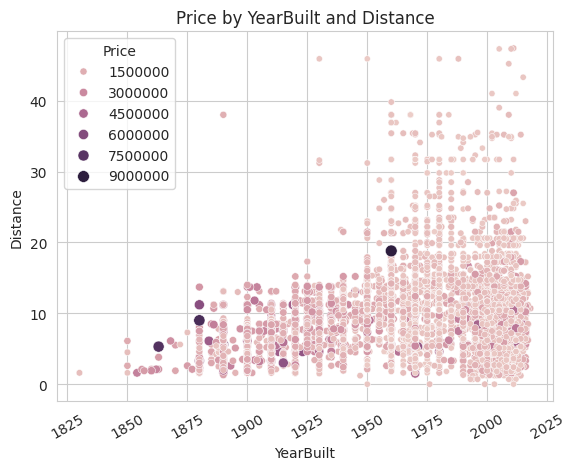

In [345]:
filtered_df_year = df[df['YearBuilt'] > 1800]
sns.scatterplot(data=filtered_df_year, x='YearBuilt', y='Distance', hue='Price', size='Price')
plt.xticks(rotation=30)
plt.title('Price by YearBuilt and Distance')
plt.xlabel('YearBuilt')
plt.ylabel('Distance')
plt.show()

21) Scatterplots showing the relationship between `YearBuilt` and `Price` for each region

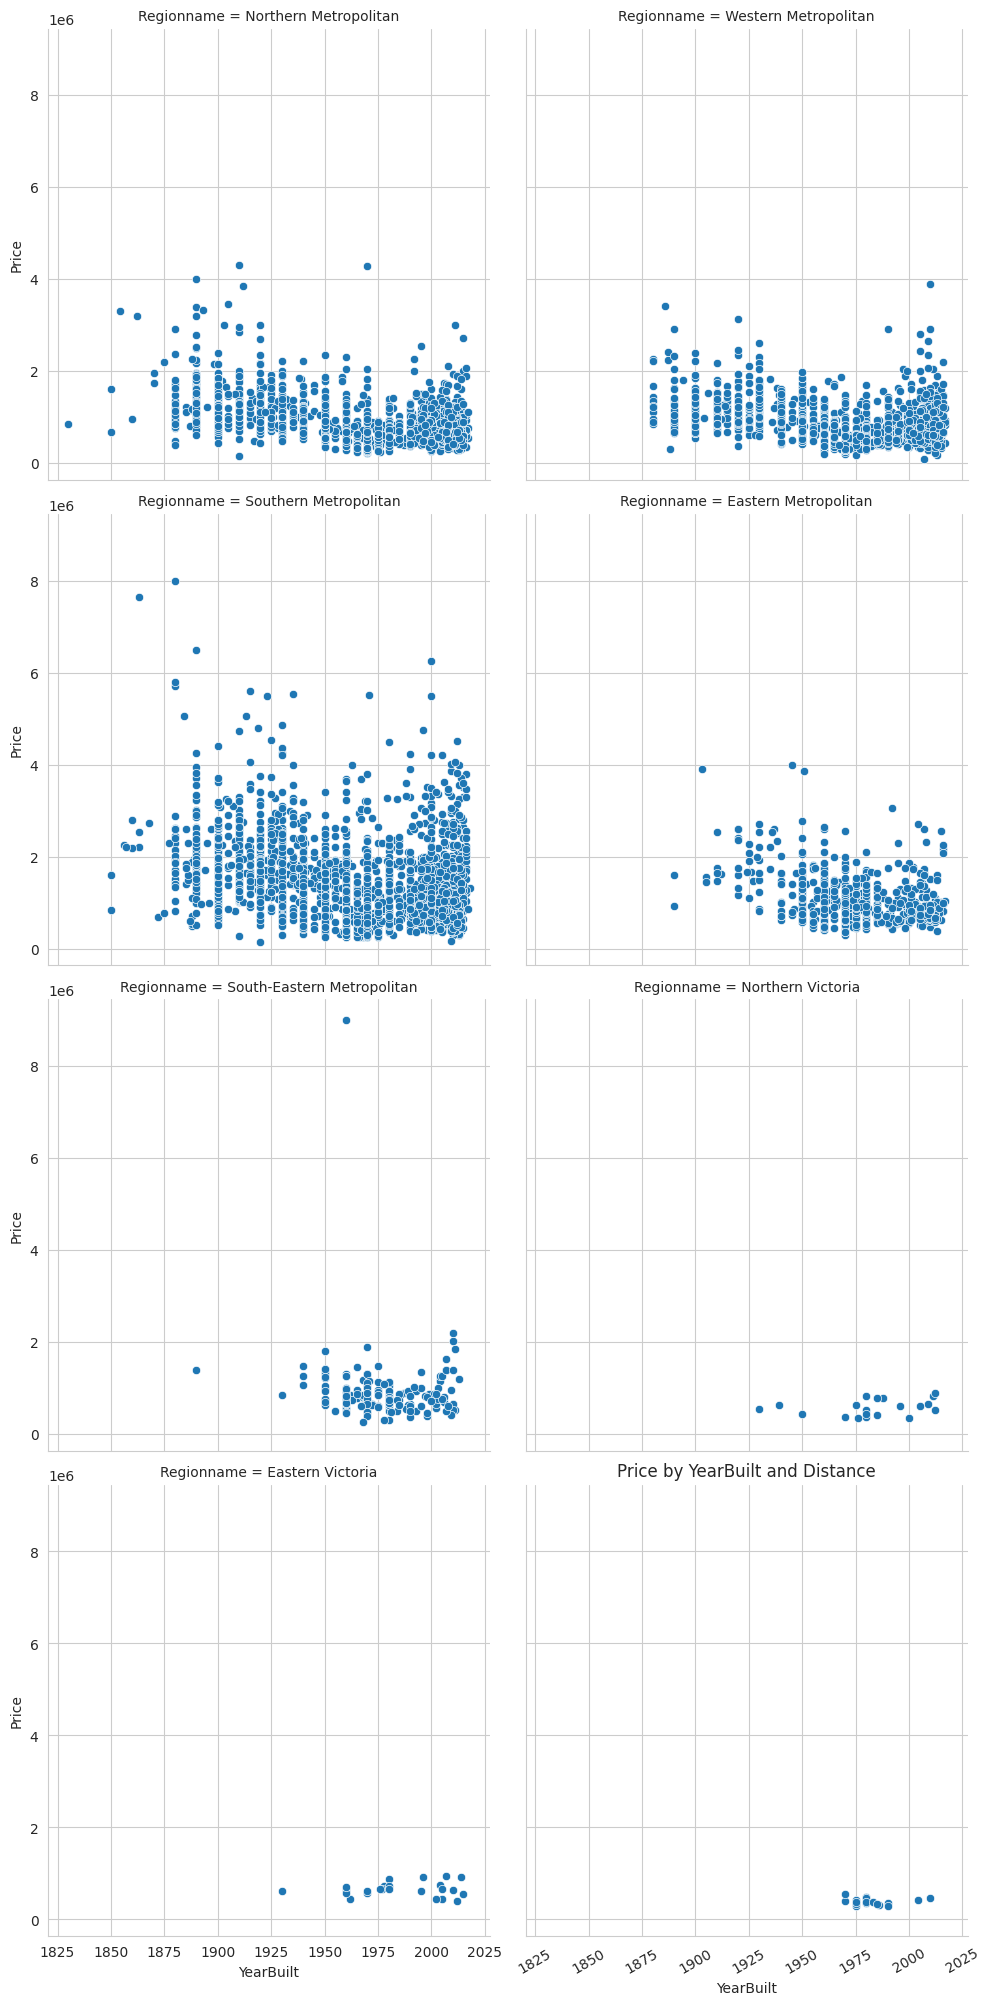

In [346]:
filtered_df_year = df[df['YearBuilt'] > 1800]
sns.relplot(data=filtered_df_year, x='YearBuilt', y='Price', col='Regionname', col_wrap=2, kind='scatter')

plt.xticks(rotation=30)
plt.title('Price by YearBuilt and Distance')
plt.xlabel('YearBuilt')
plt.ylabel('Distance')
plt.show()

22) Top 10 most expensive suburbs in Eastern Metropolitan

<ipython-input-347-1b5477d28640>:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




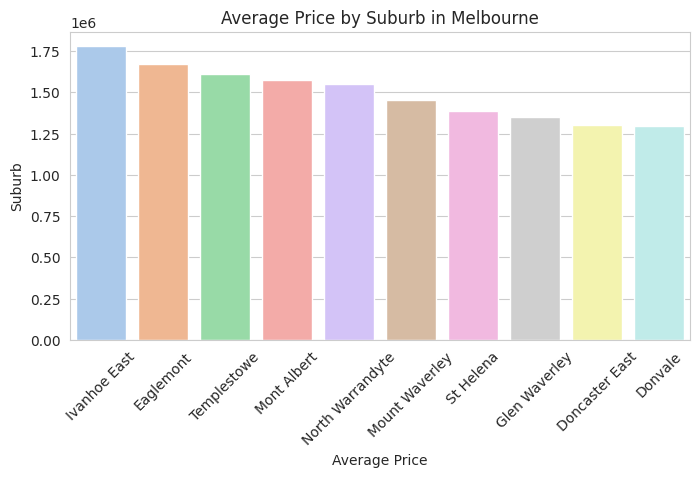

In [347]:
avg_price_by_suburb = df.groupby(['Regionname', 'Suburb'])['Price'].mean().reset_index()
avg_price_by_suburb = avg_price_by_suburb[avg_price_by_suburb['Regionname'] == 'Eastern Metropolitan']
avg_price_by_suburb = avg_price_by_suburb.sort_values(by='Price', ascending=False)
avg_price_by_suburb = avg_price_by_suburb.iloc[:10]

plt.figure(figsize=(8, 4))
sns.barplot(y='Price', x='Suburb', data=avg_price_by_suburb, palette='pastel')

plt.xticks(rotation=45)
plt.title('Average Price by Suburb in Melbourne')
plt.xlabel('Average Price')
plt.ylabel('Suburb')
plt.show()

## Temporal Analysis

23) `Price` vs `Date`

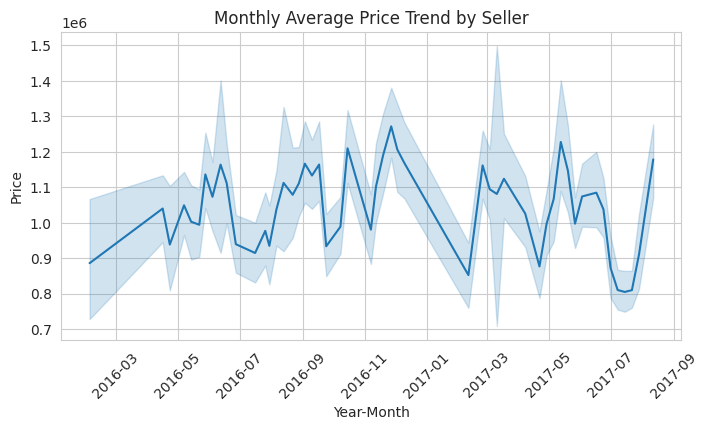

In [348]:
end_date = df['Date'].max()
start_date = df['Date'].min()
# df_filtered = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]

plt.figure(figsize=(8, 4))
sns.lineplot(data=df, x='Date', y='Price')

plt.xticks(rotation=45)
plt.title('Monthly Average Price Trend by Seller')
plt.xlabel('Year-Month')
plt.ylabel('Price')

plt.show()

24) Average price by month

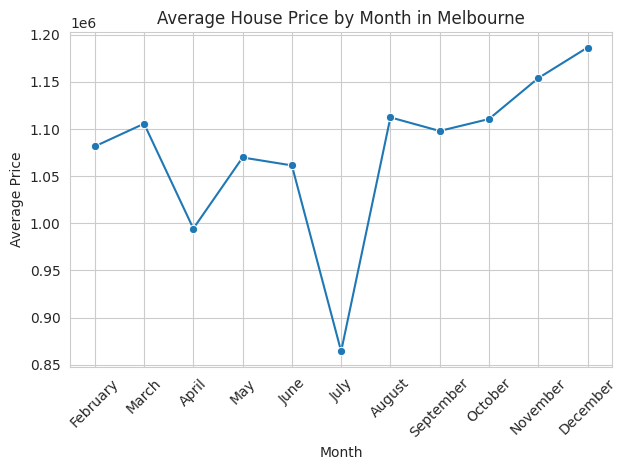

In [349]:
avg_price_by_month = df.groupby(['MonthName'])['Price'].mean().reindex(month_names.values()).reset_index()

sns.lineplot(x='MonthName', y='Price', data=avg_price_by_month, marker='o')
plt.title('Average House Price by Month in Melbourne')
plt.xlabel('Month')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

25) Boxplot of prices per month

<ipython-input-350-ee490c31c3d5>:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




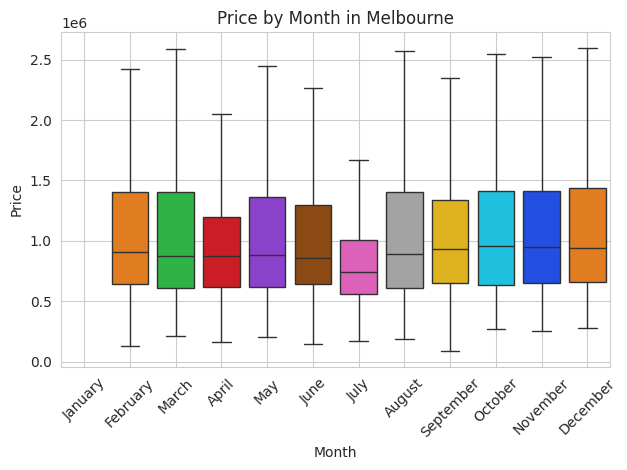

In [350]:
sns.boxplot(x='MonthName', y='Price', data=df, palette='bright', order=order_months, showfliers=False)
plt.title('Price by Month in Melbourne')
plt.xlabel('Month')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

26) Boxplot of Distance per month

<ipython-input-351-3b427463e7f9>:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




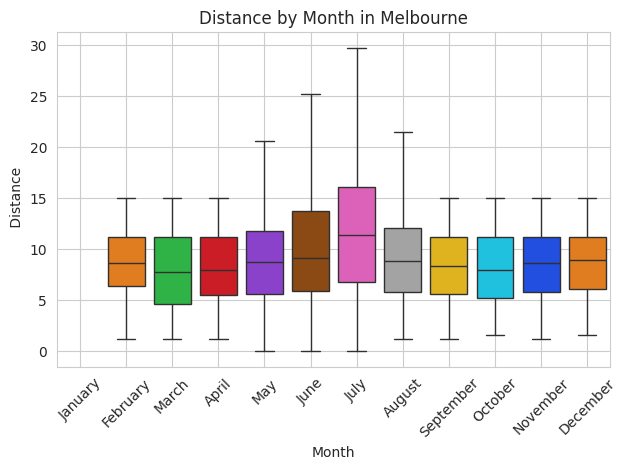

In [351]:
sns.boxplot(x='MonthName', y='Distance', data=df, palette='bright', order=order_months, showfliers=False)
plt.title('Distance by Month in Melbourne')
plt.xlabel('Month')
plt.ylabel(' Distance')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

27) Boxplot of YearBuilt per Month

<ipython-input-352-dfe38bbf8699>:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




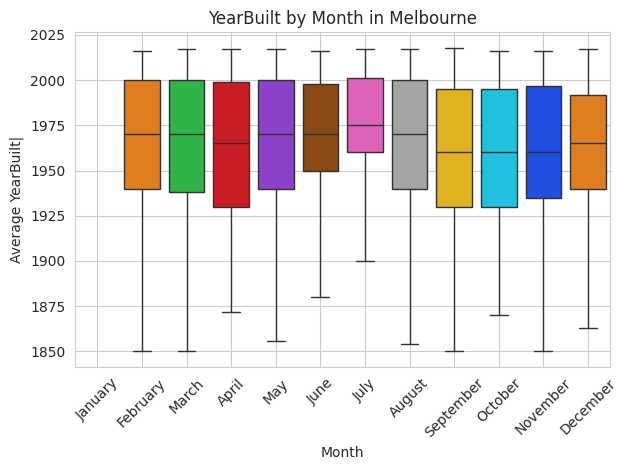

In [352]:
sns.boxplot(x='MonthName', y='YearBuilt', data=df, palette='bright', order=order_months, showfliers=False)
plt.title('YearBuilt by Month in Melbourne')
plt.xlabel('Month')
plt.ylabel('Average YearBuilt|')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

28)

<ipython-input-353-91a9d9481bee>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




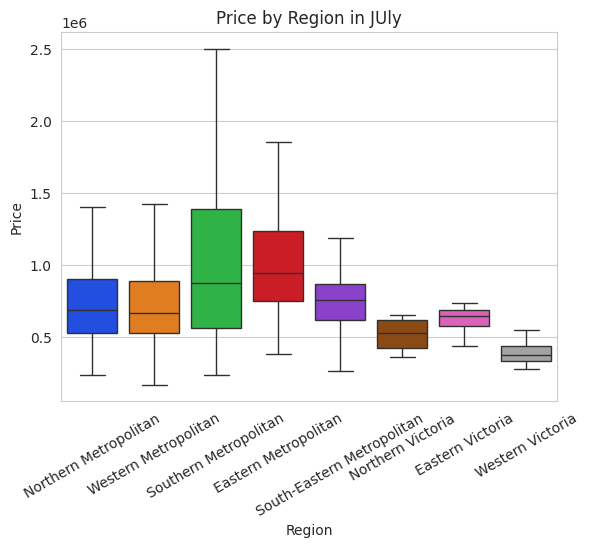

In [353]:
df_july = df[df['MonthName'] == 'July']
sns.boxplot(data=df_july, x='Regionname', y='Price', palette='bright',  showfliers=False)

plt.xticks(rotation=30)
plt.title('Price by Region in JUly')
plt.xlabel('Region')
plt.ylabel('Price')

plt.show()

## Property Characteristics

29)

<ipython-input-354-c6e1d5c41166>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-354-c6e1d5c41166>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




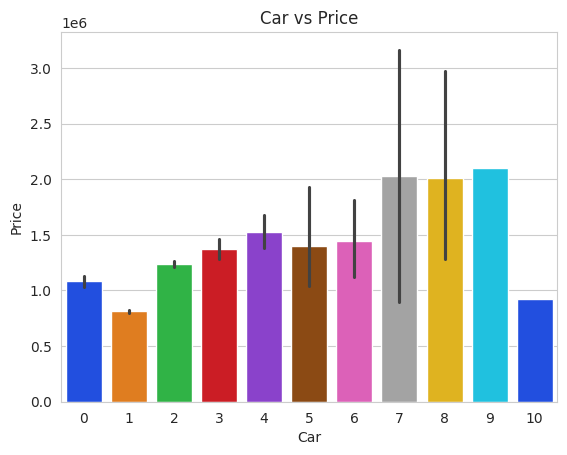

In [354]:
df['Car'] = df['Car'].apply(lambda x: int(x))
sns.barplot(data=df, x='Car', y='Price', palette='bright')

plt.title('Car vs Price')
plt.xlabel('Car')
plt.ylabel('Price')

plt.show()

30)

<ipython-input-355-013032005f17>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-355-013032005f17>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




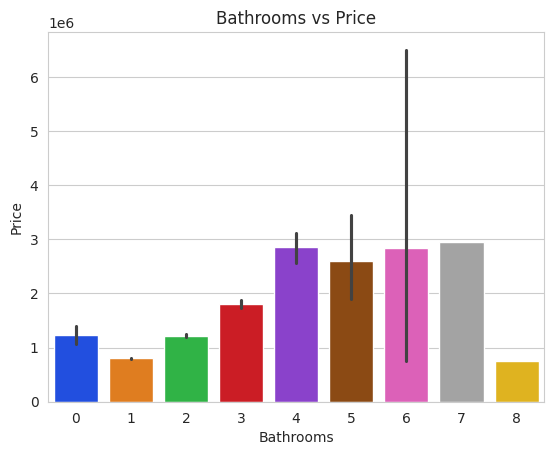

In [355]:
df['Bathroom'] = df['Bathroom'].apply(lambda x: int(x))
sns.barplot(data=df, x='Bathroom', y='Price', palette='bright')

plt.title('Bathrooms vs Price')
plt.xlabel('Bathrooms')
plt.ylabel('Price')

plt.show()

31)

<ipython-input-356-18e717e0244b>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-356-18e717e0244b>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




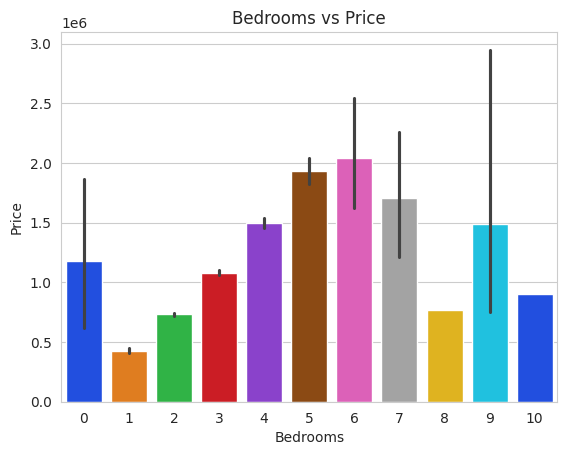

In [356]:
df['Bedroom2'] = df['Bedroom2'].apply(lambda x: int(x))
sns.barplot(data=df, x='Bedroom2', y='Price', palette='bright')

plt.title('Bedrooms vs Price')
plt.xlabel('Bedrooms')
plt.ylabel('Price')

plt.show()

## Seller Analysis

32)

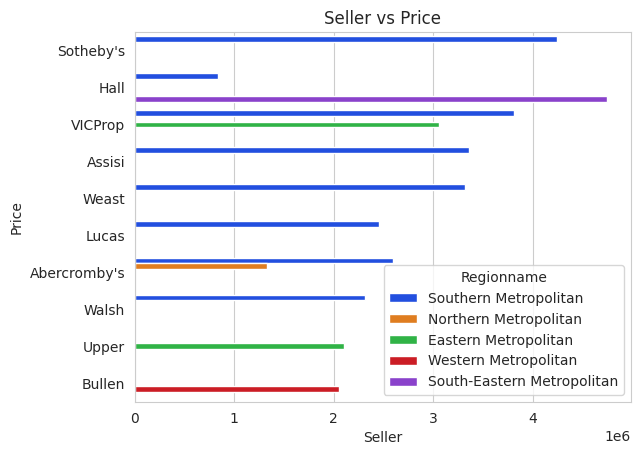

In [357]:
sellers = df.groupby('SellerG')['Price'].mean().reset_index().sort_values('Price', ascending=False)['SellerG'].tolist()[:10]
df_sellers = df[df['SellerG'].isin(sellers)]
sns.barplot(data=df_sellers, y='SellerG', x='Price', hue='Regionname', order=sellers, palette='bright', errorbar=('ci', 0))

plt.title('Seller vs Price')
plt.xlabel('Seller')
plt.ylabel('Price')

plt.show()

33)

<ipython-input-358-102696b27113>:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




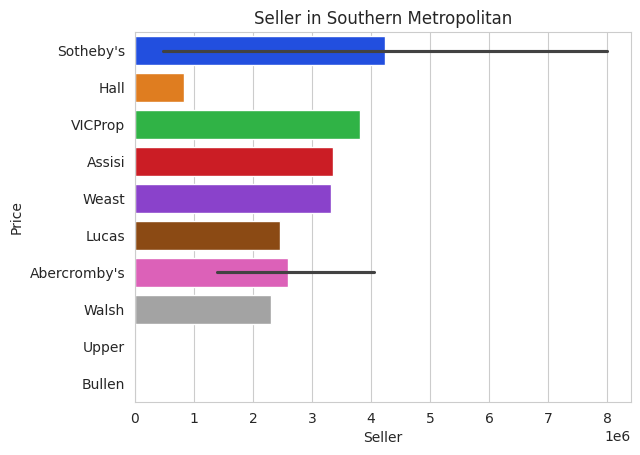

In [358]:
sns.barplot(data=df[df['Regionname'] == 'Southern Metropolitan'], y='SellerG', x='Price', order=sellers, palette='bright')

plt.title('Seller in Southern Metropolitan')
plt.xlabel('Seller')
plt.ylabel('Price')

plt.show()